<a href="https://colab.research.google.com/github/NienkevanHeek/portfolio_projects/blob/main/Module_6_%7C_Final_Assignment_%7C_GDP_and_Income_Inequality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IMPORTING THE MODULES AND DATAFRAMES**

In [ ]:
# importing the necessary packages for this assignment
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [ ]:
# I uploaded the dataframes to my Github, and I'll use the raw link there to use the file on Google Colab:
# Importing the GDP dataframe
urlGDP = 'https://raw.githubusercontent.com/NienkevanHeek/datafiles/main/gdp-per-capita-penn-world-table.csv'
urlinequality = 'https://raw.githubusercontent.com/NienkevanHeek/datafiles/main/inequality.csv'


df_GDP = pd.read_csv(urlGDP)
df_inequality = pd.read_csv(urlinequality)

In [ ]:
# Let's see if the data imported correctly
df_GDP

,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)"
0,Albania,ALB,1970,3114.0884
1,Albania,ALB,1971,3159.8088
2,Albania,ALB,1972,3214.6665
3,Albania,ALB,1973,3267.8481
4,Albania,ALB,1974,3330.0708
...,...,...,...,...
10394,Zimbabwe,ZWE,2015,2880.9058
10395,Zimbabwe,ZWE,2016,2919.6170
10396,Zimbabwe,ZWE,2017,3112.8750
10397,Zimbabwe,ZWE,2018,3007.2370


In [ ]:
# And the inequality dataset:
df_inequality

,Country,Year,Gini coefficient (before tax) (World Inequality Database),Income share of the richest 10% (before tax) (World Inequality Database),Income share of the richest 1% (before tax) (World Inequality Database),Income share of the richest 0.1% (before tax) (World Inequality Database),Income share of the poorest 50% (before tax) (World Inequality Database),Palma ratio (before tax) (World Inequality Database),p0p100_gini_posttax_nat,s80_s20_ratio_pretax,...,p60p70_thr_posttax_nat,p70p80_thr_posttax_nat,p80p90_thr_posttax_nat,p90p100_thr_posttax_nat,p99_999p100_thr_posttax_nat,p99_99p100_thr_posttax_nat,p99_9p100_thr_posttax_nat,p99p100_thr_posttax_nat,median_pretax,median_posttax_nat
0,Afghanistan,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9922,Zimbabwe,2017,0.635799,52.569996,17.48,5.15,11.25,7.281163,NaN,41.567900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2416.1062,NaN
9923,Zimbabwe,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9924,Zimbabwe,2019,0.685154,58.950000,21.08,5.89,9.23,10.094178,NaN,56.850395,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957.0613,NaN
9925,Zimbabwe,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#**PREPARING THE DATA FOR ANALYSIS**

In [ ]:
# In order to look at the correlation between GDP and Gini, we need to merge both tables on country/entity and year. We want an inner join (the default), as we only want data that has both country/year, GDP and Gini.
df_complete = pd.merge(df_GDP, df_inequality, left_on = ['Entity', 'Year'], right_on = ['Country', 'Year'])

df_complete

,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)",Country,Gini coefficient (before tax) (World Inequality Database),Income share of the richest 10% (before tax) (World Inequality Database),Income share of the richest 1% (before tax) (World Inequality Database),Income share of the richest 0.1% (before tax) (World Inequality Database),Income share of the poorest 50% (before tax) (World Inequality Database),...,p60p70_thr_posttax_nat,p70p80_thr_posttax_nat,p80p90_thr_posttax_nat,p90p100_thr_posttax_nat,p99_999p100_thr_posttax_nat,p99_99p100_thr_posttax_nat,p99_9p100_thr_posttax_nat,p99p100_thr_posttax_nat,median_pretax,median_posttax_nat
0,Albania,ALB,1980,3714.5410,Albania,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,ALB,1981,3786.3180,Albania,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,ALB,1982,3724.3580,Albania,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,1983,3775.8096,Albania,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albania,ALB,1984,3738.4922,Albania,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,Zimbabwe,ZWE,2015,2880.9058,Zimbabwe,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6696,Zimbabwe,ZWE,2016,2919.6170,Zimbabwe,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6697,Zimbabwe,ZWE,2017,3112.8750,Zimbabwe,0.635799,52.569996,17.48,5.15,11.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2416.1062,NaN
6698,Zimbabwe,ZWE,2018,3007.2370,Zimbabwe,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Now we can create a new dataframe that has the relevant columns. I'll use Entity, Country (to check if country and entity are the same), Year and Gini:
df = pd.DataFrame(df_complete, columns = ['Entity', 'Country', 'Year', 'GDP per capita (output, multiple price benchmarks)', 'Gini coefficient (before tax) (World Inequality Database)'])

df

,Entity,Country,Year,"GDP per capita (output, multiple price benchmarks)",Gini coefficient (before tax) (World Inequality Database)
0,Albania,Albania,1980,3714.5410,NaN
1,Albania,Albania,1981,3786.3180,NaN
2,Albania,Albania,1982,3724.3580,NaN
3,Albania,Albania,1983,3775.8096,NaN
4,Albania,Albania,1984,3738.4922,NaN
...,...,...,...,...,...
6695,Zimbabwe,Zimbabwe,2015,2880.9058,NaN
6696,Zimbabwe,Zimbabwe,2016,2919.6170,NaN
6697,Zimbabwe,Zimbabwe,2017,3112.8750,0.635799
6698,Zimbabwe,Zimbabwe,2018,3007.2370,NaN


In [ ]:
# It looks like the Country and Entity columns are indeed the same, so we'll drop 'Country':
df = df.drop('Country', axis = 1)

df


,Entity,Year,"GDP per capita (output, multiple price benchmarks)",Gini coefficient (before tax) (World Inequality Database)
0,Albania,1980,3714.5410,NaN
1,Albania,1981,3786.3180,NaN
2,Albania,1982,3724.3580,NaN
3,Albania,1983,3775.8096,NaN
4,Albania,1984,3738.4922,NaN
...,...,...,...,...
6695,Zimbabwe,2015,2880.9058,NaN
6696,Zimbabwe,2016,2919.6170,NaN
6697,Zimbabwe,2017,3112.8750,0.635799
6698,Zimbabwe,2018,3007.2370,NaN


In [ ]:
# Lets rename the GDP and Gini columns.
# Now we drop data where GDP or Gini is NaN
df = df.rename(columns = {'GDP per capita (output, multiple price benchmarks)': 'GDP per capita', 'Gini coefficient (before tax) (World Inequality Database)': 'Gini coefficient (before tax)'})
df = df.dropna(subset = ['GDP per capita', 'Gini coefficient (before tax)'] )

df

,Entity,Year,GDP per capita,Gini coefficient (before tax)
16,Albania,1996,4862.4824,0.467630
22,Albania,2002,5636.1846,0.481698
25,Albania,2005,6531.7970,0.474482
28,Albania,2008,8615.2400,0.472132
32,Albania,2012,11106.7690,0.467515
...,...,...,...,...
6671,Zimbabwe,1991,6175.5547,0.624443
6676,Zimbabwe,1996,6447.4220,0.624443
6691,Zimbabwe,2011,2449.2092,0.624443
6697,Zimbabwe,2017,3112.8750,0.635799


#**FIRST LOOK AT THE DATA**

In [ ]:
# Now we can look at the data to see if the data looks good for analysis:
df.describe()
df.columns.values

array(['Entity', 'Year', 'GDP per capita',
       'Gini coefficient (before tax)'], dtype=object)

In [ ]:
# We use the code Niels used in an earlier module to look at the data:
def print_separator(sep, num, msg):
  print("\n")
  print(sep * num)
  print(f"{msg}")
  print(sep * num)


def look_at_unique_values(column):
  unique_values_cutoff = 160
  unique_values = column.unique()
  num_unique_values = len(unique_values)
  if num_unique_values == len(column):
    print(f"Each value in the column is unique (total: {num_unique_values})")
  elif num_unique_values < unique_values_cutoff:
    print(f"Less than {unique_values_cutoff} unique values:")
    # We may get an error when sorting
    try:
      sorted = np.sort(unique_values)
      print("Values are sorted")# We
      display(list(sorted))
    except:
      print("Could not sort values")
      display(list(unique_values))
  else:
    print(f"More than {unique_values_cutoff} unique values (total: {num_unique_values})")


def look_at_edges(df, column_name):
  # inner function
  def show_head_and_tail(values):
      num_items_to_slice = 10
      display(list(values)[:num_items_to_slice])
      display(list(values)[-num_items_to_slice:])

  column = df[column_name]
  unique_values = column.unique()
  try:
      sorted = np.sort(unique_values)
      print("Unique values sorted, head and tail:")
      show_head_and_tail(sorted)
  except TypeError as error:
      print(f"Could not sort values: {error}")
      print("..so let's try filtering NULL values and then sorting")
      non_null_uniques = df.loc[~df[column_name].isnull(), column_name].unique()
      sorted = np.sort(non_null_uniques)
      show_head_and_tail(sorted)


def cast_to_type(column, maybe_type):
  try:
    column.astype(maybe_type)
    print(f"Casting to {maybe_type} was successful")
  except ValueError as error:
    print(f"Could not cast to {maybe_type}: {error}")


def find_non_default_missing_values(df, column_name, maybe_type):
  long_separator_amount = 80
  short_separator_amount = 40

  print_separator("*", long_separator_amount, f"Finding non default missing values for column \"{column_name}\"")

  print(f"Column \"{column_name}\" has datatype: {df.dtypes[column_name]}")

  column = df[column_name]

  # A
  print_separator("-", short_separator_amount, "A: Looking at unique values")
  look_at_unique_values(column)

  # B
  print_separator("-", short_separator_amount, "B: Sorting and looking at the edges")
  look_at_edges(df, column_name)

  # C
  print_separator("-", short_separator_amount, f"C: Casting to type: {maybe_type}")
  cast_to_type(column, maybe_type)

  # D
  print_separator("-", short_separator_amount, "D: Looking at frequency")
  display(column.value_counts(dropna=False))

  print("\n")

find_non_default_missing_values(df, "Entity", "string")




********************************************************************************
Finding non default missing values for column "Entity"
********************************************************************************
Column "Entity" has datatype: object


----------------------------------------
A: Looking at unique values
----------------------------------------
Less than 160 unique values:
Values are sorted


['Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guinea',
 'Guinea-Bissau',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Kyrgyzstan',
 'Laos',
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Lib



----------------------------------------
B: Sorting and looking at the edges
----------------------------------------
Unique values sorted, head and tail:


['Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh']

['Ukraine',
 'United Arab Emirates',
 'United Kingdom',
 'United States',
 'Uruguay',
 'Uzbekistan',
 'Vietnam',
 'Yemen',
 'Zambia',
 'Zimbabwe']



----------------------------------------
C: Casting to type: string
----------------------------------------
Casting to string was successful


----------------------------------------
D: Looking at frequency
----------------------------------------


United States            70
Canada                   69
New Zealand              69
Australia                69
France                   69
                         ..
Congo                     2
Sao Tome and Principe     2
Qatar                     2
Turkmenistan              1
Oman                      1
Name: Entity, Length: 149, dtype: int64

#**INITIAL ANALYSIS PER COUNTRY**

In [ ]:
# The data looks good. Although we eventually want to look at the Pearson Correlation of the entire dataset, it might make sense to look at the correlation between GDP and Gini over the years for specific countries.
# Plus its a good way of practicing grouping data and making figures ;)!
# To do this, we are going to group the data based on country.
country_grp = df.groupby(['Entity'])[['Year', 'GDP per capita', 'Gini coefficient (before tax)']]

# Now let's look at countries on different continents/with different economies to see if there seems to be a correlation:
# We will look at [1] United States, [2] Zimbabwe, [3] China, [4] Netherlands, [5] Brazil

##**UNITED STATES**

In [ ]:
# [1] United States
country_grp.get_group('United States')

,Year,GDP per capita,Gini coefficient (before tax)
6369,1950,15911.842,0.509826
6370,1951,16814.244,0.496028
6371,1952,17094.783,0.483607
6372,1953,17586.408,0.475661
6373,1954,17226.950,0.483386
...,...,...,...
6434,2015,58543.562,0.583535
6435,2016,59115.330,0.584272
6436,2017,60116.570,0.580764
6437,2018,61618.742,0.584061


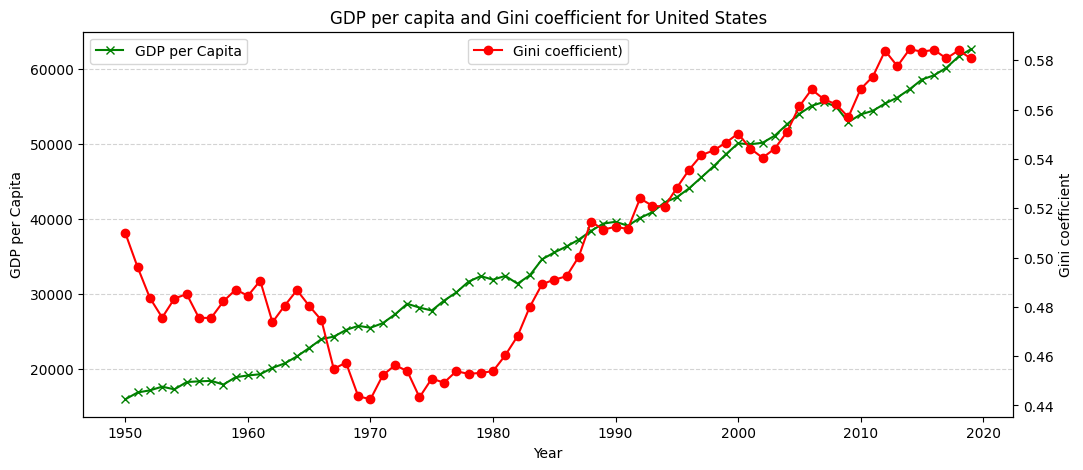

In [ ]:
# Let's make a plot that shows both GDP and Gini (double Y-axis)
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('GDP per capita and Gini coefficient for United States')
ax.set_xlabel('Year')
ax.plot(country_grp.get_group('United States')['Year'], country_grp.get_group('United States')['GDP per capita'], color='green', marker='x')
ax2.plot(country_grp.get_group('United States')['Year'], country_grp.get_group('United States')['Gini coefficient (before tax)'], color='red', marker='o')
ax.set_ylabel('GDP per Capita')
ax2.set_ylabel('Gini coefficient')
ax.legend(['GDP per Capita'])
ax2.legend(['Gini coefficient)'], loc='upper center')
ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.show()

In [ ]:
# And let's look at the correlation!
country_grp.get_group('United States').corr()

,Year,GDP per capita,Gini coefficient (before tax)
Year,1.000000,0.993278,0.833744
GDP per capita,0.993278,1.000000,0.870076
Gini coefficient (before tax),0.833744,0.870076,1.000000


In [ ]:
# Or, as an alternative to also get a pvalue:
sp.stats.pearsonr(country_grp.get_group('United States')['Gini coefficient (before tax)'], country_grp.get_group('United States')['GDP per capita'])

PearsonRResult(statistic=0.8700763111852404, pvalue=1.4163900504814278e-22)

##**ZIMBABWE**

In [ ]:
# [2] Zimbabwe
country_grp.get_group('Zimbabwe')

,Year,GDP per capita,Gini coefficient (before tax)
6671,1991,6175.5547,0.624443
6676,1996,6447.4220,0.624443
6691,2011,2449.2092,0.624443
6697,2017,3112.8750,0.635799
6699,2019,2787.6590,0.685154


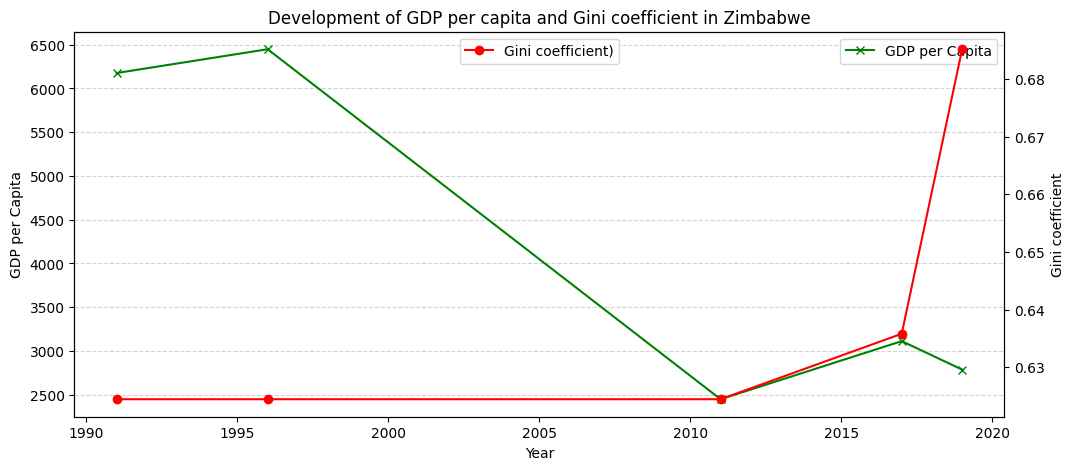

In [ ]:
# Figure for Zimbabwe
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('Development of GDP per capita and Gini coefficient in Zimbabwe')
ax.set_xlabel('Year')
ax.plot(country_grp.get_group('Zimbabwe')['Year'], country_grp.get_group('Zimbabwe')['GDP per capita'], color='green', marker='x')
ax2.plot(country_grp.get_group('Zimbabwe')['Year'], country_grp.get_group('Zimbabwe')['Gini coefficient (before tax)'], color='red', marker='o')
ax.set_ylabel('GDP per Capita')
ax2.set_ylabel('Gini coefficient')
ax.legend(['GDP per Capita'])
ax2.legend(['Gini coefficient)'], loc='upper center')
ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.show()

In [ ]:
# Correlation
country_grp.get_group('Zimbabwe').corr()

,Year,GDP per capita,Gini coefficient (before tax)
Year,1.000000,-0.926701,0.644185
GDP per capita,-0.926701,1.000000,-0.475671
Gini coefficient (before tax),0.644185,-0.475671,1.000000


In [ ]:
# Pearson result
sp.stats.pearsonr(country_grp.get_group('Zimbabwe')['Gini coefficient (before tax)'], country_grp.get_group('Zimbabwe')['GDP per capita'])

PearsonRResult(statistic=-0.47567119842131417, pvalue=0.4180414635942275)

##**CHINA**

In [ ]:
country_grp.get_group('China')

,Year,GDP per capita,Gini coefficient (before tax)
1272,1979,1677.2329,0.380560
1273,1980,1678.2577,0.382153
1274,1981,1667.3282,0.386951
1275,1982,1762.4872,0.394165
1276,1983,1871.7107,0.391918
1277,1984,2095.3680,0.396942
1278,1985,2336.5251,0.404511
1279,1986,2366.6023,0.419342
1280,1987,2443.5935,0.423174
1281,1988,2548.7253,0.426745


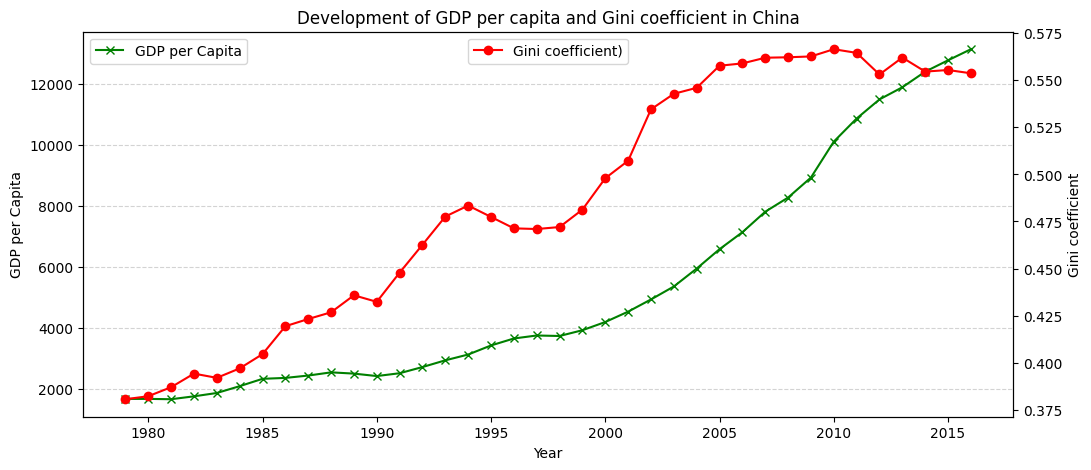

In [ ]:
# Plot for China
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('Development of GDP per capita and Gini coefficient in China')
ax.set_xlabel('Year')
ax.plot(country_grp.get_group('China')['Year'], country_grp.get_group('China')['GDP per capita'], color='green', marker='x')
ax2.plot(country_grp.get_group('China')['Year'], country_grp.get_group('China')['Gini coefficient (before tax)'], color='red', marker='o')
ax.set_ylabel('GDP per Capita')
ax2.set_ylabel('Gini coefficient')
ax.legend(['GDP per Capita'])
ax2.legend(['Gini coefficient)'], loc='upper center')
ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.show()

In [ ]:
# Correlation
country_grp.get_group('China').corr()

,Year,GDP per capita,Gini coefficient (before tax)
Year,1.000000,0.929941,0.969815
GDP per capita,0.929941,1.000000,0.854302
Gini coefficient (before tax),0.969815,0.854302,1.000000


In [ ]:
# Pearson coefficient
sp.stats.pearsonr(country_grp.get_group('China')['Gini coefficient (before tax)'], country_grp.get_group('China')['GDP per capita'])

PearsonRResult(statistic=0.8543015610577793, pvalue=9.004487425837147e-12)

##**NETHERLANDS**

In [ ]:
country_grp.get_group('Netherlands')


,Year,GDP per capita,Gini coefficient (before tax)
4326,1980,26173.992,0.368450
4327,1981,25294.805,0.371328
4328,1982,24475.873,0.374229
4329,1983,24419.023,0.383245
4330,1984,24767.418,0.385654
4331,1985,24075.873,0.386243
4332,1986,25028.982,0.384936
4333,1987,25144.990,0.384337
4334,1988,25964.035,0.382930
4335,1989,26902.656,0.379819


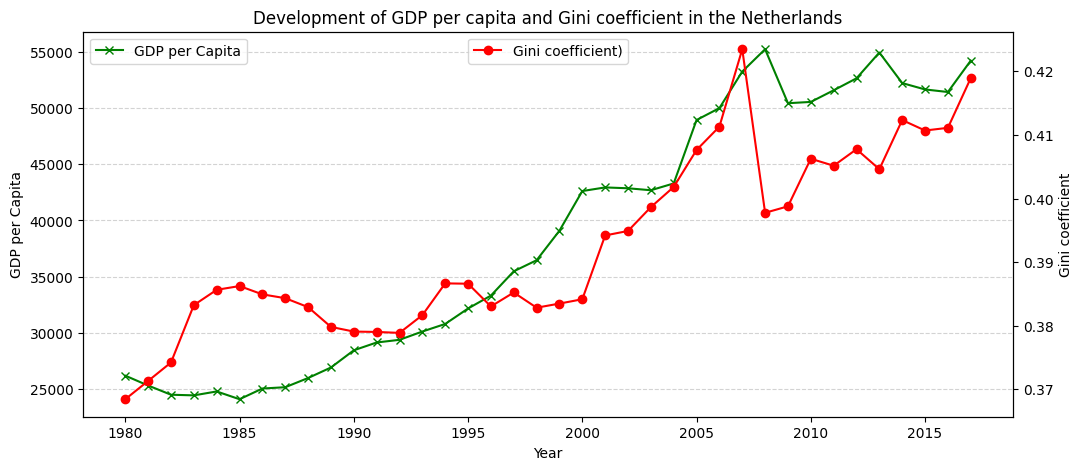

In [ ]:
# Figure
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('Development of GDP per capita and Gini coefficient in the Netherlands')
ax.set_xlabel('Year')
ax.plot(country_grp.get_group('Netherlands')['Year'], country_grp.get_group('Netherlands')['GDP per capita'], color='green', marker='x')
ax2.plot(country_grp.get_group('Netherlands')['Year'], country_grp.get_group('Netherlands')['Gini coefficient (before tax)'], color='red', marker='o')
ax.set_ylabel('GDP per Capita')
ax2.set_ylabel('Gini coefficient')
ax.legend(['GDP per Capita'])
ax2.legend(['Gini coefficient)'], loc='upper center')
ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.show()

In [ ]:
# Correlation
country_grp.get_group('Netherlands').corr()

,Year,GDP per capita,Gini coefficient (before tax)
Year,1.000000,0.966639,0.887794
GDP per capita,0.966639,1.000000,0.886420
Gini coefficient (before tax),0.887794,0.886420,1.000000


In [ ]:
# Pearson number
sp.stats.pearsonr(country_grp.get_group('Netherlands')['Gini coefficient (before tax)'], country_grp.get_group('Netherlands')['GDP per capita'])

PearsonRResult(statistic=0.8864197646206318, pvalue=1.3397018751414632e-13)

##**BRAZIL**

In [ ]:
country_grp.get_group('Brazil')

,Year,GDP per capita,Gini coefficient (before tax)
779,2001,9288.2980,0.703332
780,2002,9232.4375,0.698364
781,2003,9082.9420,0.700931
782,2004,9449.6360,0.695780
783,2005,9686.6680,0.694742
784,2006,10455.9690,0.692342
785,2007,11527.0260,0.678961
786,2008,12705.6920,0.679478
787,2009,13057.0890,0.676530
788,2010,15012.5230,0.681060


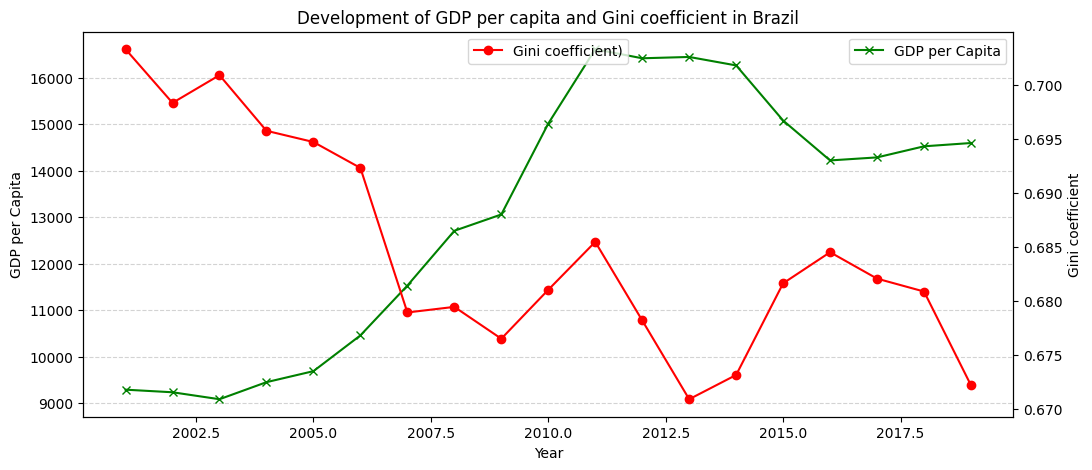

In [ ]:
# Figure
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('Development of GDP per capita and Gini coefficient in Brazil')
ax.set_xlabel('Year')
ax.plot(country_grp.get_group('Brazil')['Year'], country_grp.get_group('Brazil')['GDP per capita'], color='green', marker='x')
ax2.plot(country_grp.get_group('Brazil')['Year'], country_grp.get_group('Brazil')['Gini coefficient (before tax)'], color='red', marker='o')
ax.set_ylabel('GDP per Capita')
ax2.set_ylabel('Gini coefficient')
ax.legend(['GDP per Capita'])
ax2.legend(['Gini coefficient)'], loc='upper center')
ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.show()

In [ ]:
# Correlation
country_grp.get_group('Brazil').corr()

,Year,GDP per capita,Gini coefficient (before tax)
Year,1.000000,0.820206,-0.775190
GDP per capita,0.820206,1.000000,-0.833892
Gini coefficient (before tax),-0.775190,-0.833892,1.000000


In [ ]:
# Pearson number
sp.stats.pearsonr(country_grp.get_group('Brazil')['Gini coefficient (before tax)'], country_grp.get_group('Brazil')['GDP per capita'])

PearsonRResult(statistic=-0.8338917492531916, pvalue=9.155468223399246e-06)

##**CONCLUSIONS OF FIRST LOOK AT DATA**

1.   There seems to be a large variety in both GDP and Gini coefficient correlations among the countries.
2.   In some countries (United States, China, Netherlands), there is a strong correlation between the (positive/negative) growth of the GDP and the increase in inequality (larger Gini coefficient). The P-value is very small, and therefore the correlation is significant.
3.  In other countries (Zimbabwe, Brazil), there is strong negative correlation between GDP and Gini, meaning that when one number rises, the other will become lower. The P-value in these cases is also very small and therefore statistically relevant.

Based on this data, we can therefore not determine yet what the overall correlation is going to be for all countries. We can check this by looking at the ungrouped dataset, that takes into account all years, and all countries together.


#**ANALYSIS OF DATA OVERALL**

In [ ]:
# Let's start by looking at the correlation per country:
# Correlation
country_grp.corr()


Year  GDP per capita  \
Entity                                                             
Albania  Year                           1.000000        0.978318   
         GDP per capita                 0.978318        1.000000   
         Gini coefficient (before tax)  0.720924        0.652608   
Algeria  Year                           1.000000        0.840723   
         GDP per capita                 0.840723        1.000000   
...                                          ...             ...   
Zambia   GDP per capita                 0.884067        1.000000   
         Gini coefficient (before tax)  0.365515        0.616398   
Zimbabwe Year                           1.000000       -0.926701   
         GDP per capita                -0.926701        1.000000   
         Gini coefficient (before tax)  0.644185       -0.475671   

                                        Gini coefficient (before tax)  
Entity                                                                 
Albania  Year                                                0.720924  
         GDP per capita                                      0.652608  
         Gini coefficient (before tax)                       1.000000  
Algeria  Year                                               -0.980416  
         GDP per capita                                     -0.731383  
...                                                               ...  
Zambia   GDP per capita                                      0.616398  
         Gini coefficient (before tax)                       1.000000  
Zimbabwe Year                                                0.644185  
         GDP per capita                                     -0.475671  
         Gini coefficient (before tax)                       1.000000  

[447 rows x 3 columns]

In [ ]:
# Now let's look at the correlation of all countries/years and gini coefficients:
pearson_result_overall = sp.stats.pearsonr(df['Gini coefficient (before tax)'], df['GDP per capita'])

pearson_result_overall

NameError: ignored

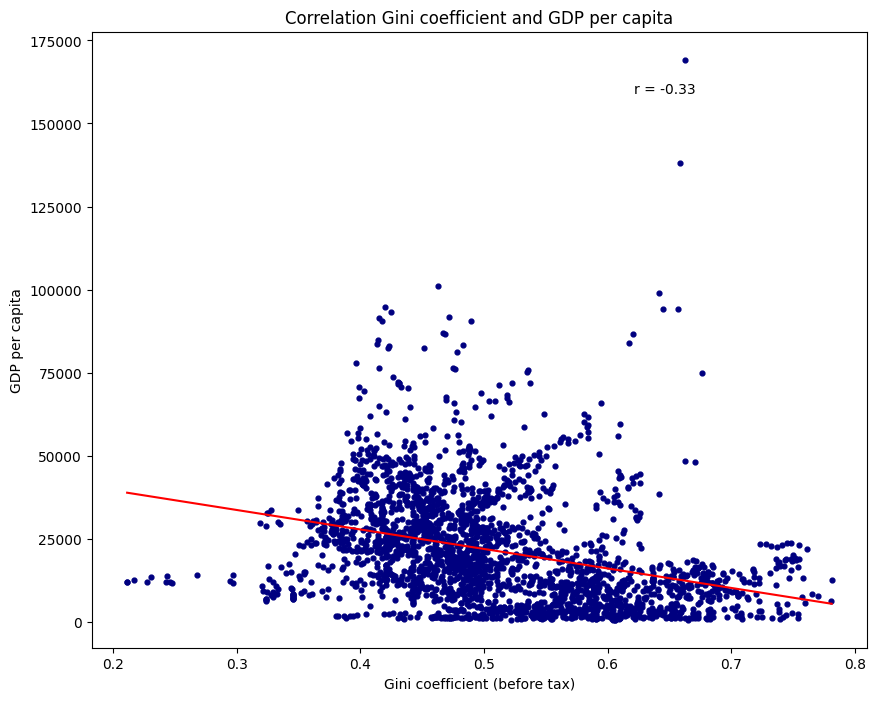

In [ ]:
# We can also plot this in a scatterplot with regression line and annotation:

x = df['Gini coefficient (before tax)']
y = df['GDP per capita']

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title("Correlation Gini coefficient and GDP per capita")
ax.set_xlabel('Gini coefficient (before tax)')
ax.set_ylabel('GDP per capita')
plt.scatter(x, y, color = 'navy', s = 12)
r, p = sp.stats.pearsonr(x, y)
plt.annotate('r = {:.2f}'.format(r), xy=(0.7, 0.9), xycoords='axes fraction')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'red')
plt.show()


##**CONCLUSION OVERALL DATA**
Is there a relation between a country's GDP and its income inequality?

Answer:
- Looking at the data of all countries and years combined, the Pearson Coefficient is -0.33. This suggests a moderate degree of negative correlation between a country's GDP and its income inequality.
- The P-value is 4.522781411097257e-65, which is very close to zero. A P-value is a number that signifies how likely it is that there is no relation between the chosen data points. Because this number is so close to zero, and definitely smaller than 0.05 (which is usually the treshold of significance), it seems likely that the calculated correlation between the data is significant and real.
- However, when looking at the data of separate countries, it becomes clear that GDP's, Gini's and the correlations differ widely between countries. Countries like Zimbabwe and Brazil have negative correlations, whereas countries like Sweden, the Netherlands, and the United States have highly positively correlated GDP's and Gini coefficients.
- We also see this in the scatterplot. The dots in the scatterplot are not always plotted very closely to the regression line, and there are some outliers.
- Moreover, the Pearson coefficient is now calculated in such a way that it does not take into account the development of GDP and Gini coefficient of seperate countries over the years. Instead, it looks at all countries and all years together to calculate the Pearson Coefficient.
- The overall Pearson Coefficient therefore needs to be looked at with some caution, as the development of GDP and coefficient per country per year might be more indicative of the relation between GDP and income inequality than looking at all countries and years together. The calculation/visualisation as it is now may also obscure other factors that play a role in the relationship between the GDP and income inequality (e.g. economic situation, political system).
